In [13]:
import math 
import pandas_datareader as pd
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [14]:
import yfinance as yf

start = '2015-01-01'
end = '2024-06-30'
# df = data.DataReader('AAPL', 'yahoo', start, end)
df = yf.download('AAPL', start=start, end=end)
df.shape

[*********************100%%**********************]  1 of 1 completed


(2388, 6)

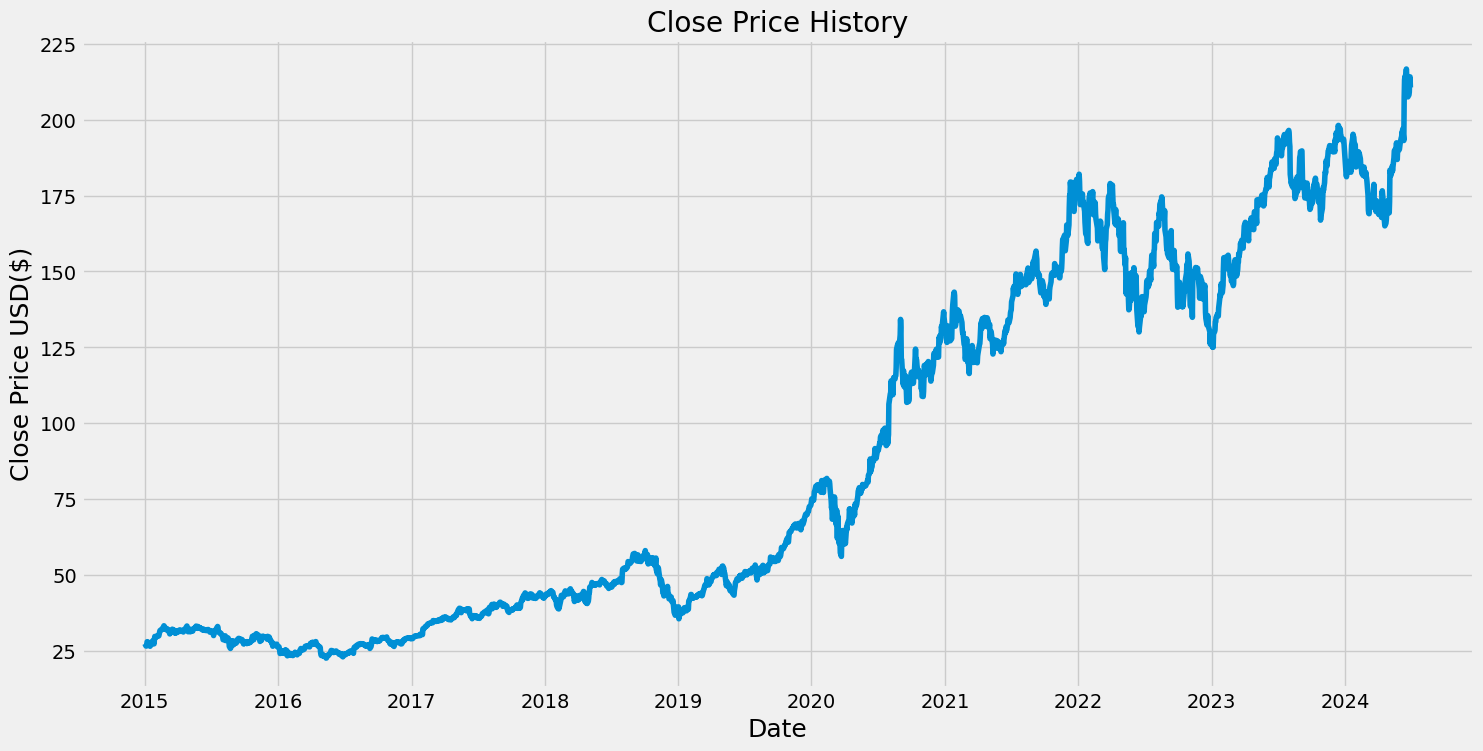

In [15]:
#Visualizing
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize='18')
plt.ylabel('Close Price USD($)', fontsize=18)
plt.show()

In [16]:
#Create a new dataframe with only close column
data=df.filter(['Close'])
#Convert dataframe to numpy array
dataset=data.values
#Rounded up number of rows to train the model on
training_data_len = math.ceil(len(dataset) * 0.8)
training_data_len


1911

In [17]:
#Scaling the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.02446094],
       [0.0204936 ],
       [0.02050649],
       ...,
       [0.98237886],
       [0.98675842],
       [0.96882807]])

In [18]:
#Scaled training dataset
train_data= scaled_data[0: training_data_len, :]
#Splitting the data into x_train and y_train
x_train = []
y_train = []

for i in range (90, len(train_data)):
    x_train.append(train_data[i-90:i,0])
    y_train.append(train_data[i,0])
    if i<=90:
        print(x_train)
        print(y_train)
        print()



[array([0.02446094, 0.0204936 , 0.02050649, 0.02242575, 0.02775846,
       0.02791304, 0.02435789, 0.02560734, 0.02506635, 0.02122782,
       0.0201587 , 0.0236752 , 0.02474432, 0.02841539, 0.02916249,
       0.02931705, 0.0242162 , 0.03216374, 0.03678801, 0.03454673,
       0.03644022, 0.03646599, 0.03763815, 0.03812763, 0.03682665,
       0.03784425, 0.04080686, 0.04449082, 0.04652601, 0.04732463,
       0.0482907 , 0.04943711, 0.04908932, 0.05044182, 0.05495016,
       0.05388103, 0.04952727, 0.05162687, 0.04910221, 0.0499137 ,
       0.05026149, 0.04920524, 0.04646161, 0.04670634, 0.04740192,
       0.04401423, 0.04109025, 0.04393694, 0.04282917, 0.04458098,
       0.04727311, 0.04911508, 0.04786563, 0.04580468, 0.04749208,
       0.04682228, 0.04255867, 0.04366644, 0.04239123, 0.04641009,
       0.04391118, 0.04367932, 0.04505758, 0.04767241, 0.04594637,
       0.04541825, 0.04665482, 0.04735039, 0.04702837, 0.04631992,
       0.0469382 , 0.04615246, 0.04432337, 0.04799444, 0.0471

In [19]:
#Converting x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape

(1821, 90)

In [20]:
#Reshaping the data as LSTM model expects 3-dimensions
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1821, 90, 1)

In [22]:
#LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
#Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [27]:
#Training the model
model.fit(x_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
1821/1821 ━━━━━━━━━━━━━━━━━━━━ 82s 45ms/step - loss: 2.4096e-04
Epoch 2/5
1821/1821 ━━━━━━━━━━━━━━━━━━━━ 70s 39ms/step - loss: 2.0693e-04
Epoch 3/5
1821/1821 ━━━━━━━━━━━━━━━━━━━━ 70s 39ms/step - loss: 3.7594e-04
Epoch 4/5
1821/1821 ━━━━━━━━━━━━━━━━━━━━ 68s 37ms/step - loss: 2.0665e-04
Epoch 5/5
1821/1821 ━━━━━━━━━━━━━━━━━━━━ 71s 39ms/step - loss: 2.3140e-04


In [34]:
model.save('forecast.h5')

In [36]:
#Creating the testing dataset
test_data=scaled_data[training_data_len - 90: , :]
#Create datasets x_test and y_test
x_test = []
y_test = dataset[training_data_len: , :]
for i in range(90, len(test_data)):
    x_test.append(test_data[i-90:i, 0])



In [37]:
#Converting the test data into numpy array
x_test = np.array(x_test)
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
#Get the model's predicted price value
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)



15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


In [38]:
#Model evaluation


#Rmse (root mean squared error)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

3.0018627398668847

C:\Users\HP\AppData\Local\Temp\ipykernel_24336\2923466182.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


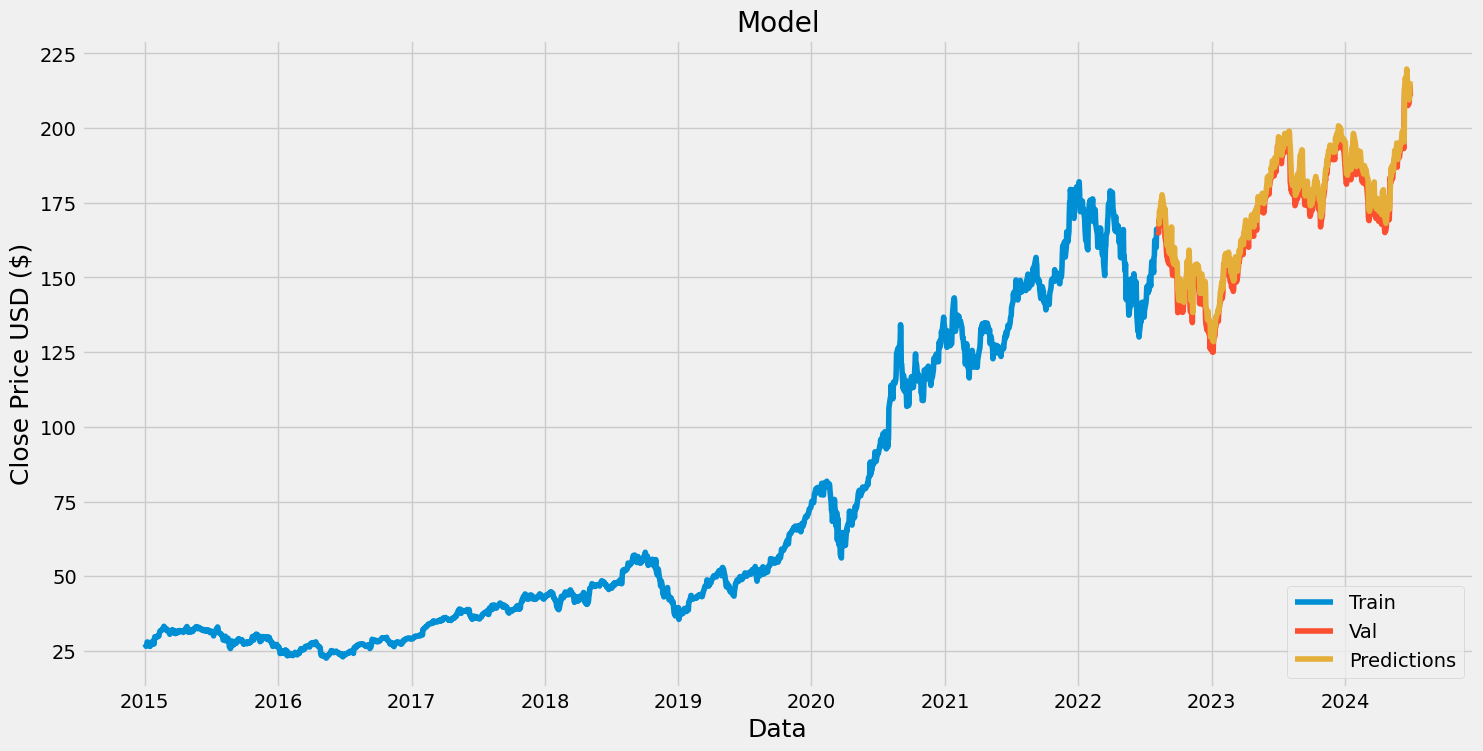

In [39]:
#Plot the data
train= data[:training_data_len]
valid = data[training_data_len :]
valid['Predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [40]:
valid

,Close,Predictions
Date,,
2022-08-05,165.350006,168.446854
2022-08-08,164.869995,168.517365
2022-08-09,164.919998,167.940369
2022-08-10,169.240005,167.980927
2022-08-11,168.490005,172.278061
...,...,...
2024-06-24,208.139999,209.403229
2024-06-25,209.070007,209.928391
2024-06-26,213.250000,210.646805
